In [89]:
# Necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import joblib

In [70]:
#Assign Column names
column_names = [
    "age",        # Age of the patient
    "sex",        # Sex (0 = female, 1 = male)
    "cp",         # Chest pain type (categorical: 0-3)
    "trestbps",   # Resting blood pressure (mm Hg)
    "chol",       # Serum cholesterol (mg/dl)
    "fbs",        # Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
    "restecg",    # Resting electrocardiographic results (0-2)
    "thalach",    # Maximum heart rate achieved
    "exang",      # Exercise induced angina (1 = yes, 0 = no)
    "oldpeak",    # ST depression induced by exercise
    "slope",      # The slope of the peak exercise ST segment
    "ca",         # Number of major vessels (0-3) colored by fluoroscopy
    "thal",       # Thalassemia test result (3 = normal, 6 = fixed defect, 7 = reversible defect)
    "target"      # Target: heart disease diagnosis (0 = no disease, 1-4 = disease)
]


In [71]:
# Load the dataset
df = pd.read_csv('../heart+disease/processed.cleveland.data', names=column_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [73]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [74]:
df.shape

(303, 14)

In [75]:
df = df.replace("?", np.nan)

In [76]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [77]:
df = df.dropna()

In [78]:
df.isna().sum().sum()

np.int64(0)

In [79]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

In [80]:
# Perform data encoding (one-hot encoding for categorical variables).
categorical_cols = ["cp", "restecg", "slope", "ca", "thal"]

encoder = OneHotEncoder(sparse_output=False)

encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame( encoded_features, columns=encoder.get_feature_names_out(categorical_cols),index=df.index)

df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [81]:
# Perform data scaling (standardization for numeric variables).
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


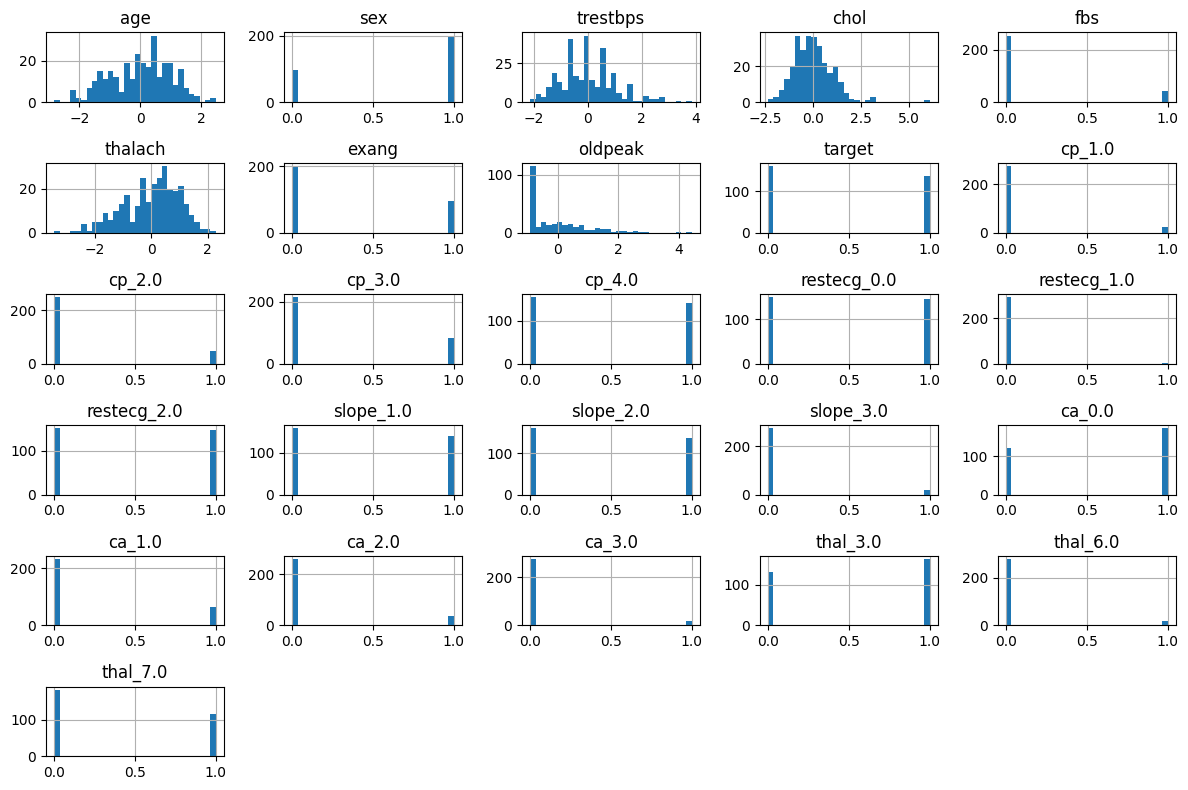

In [82]:
# Histograms
df.hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

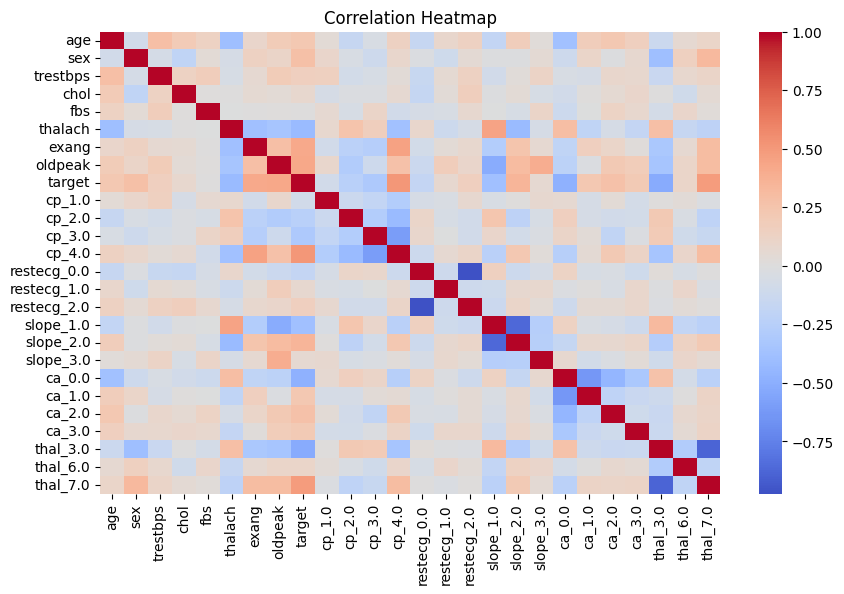

In [87]:
# Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

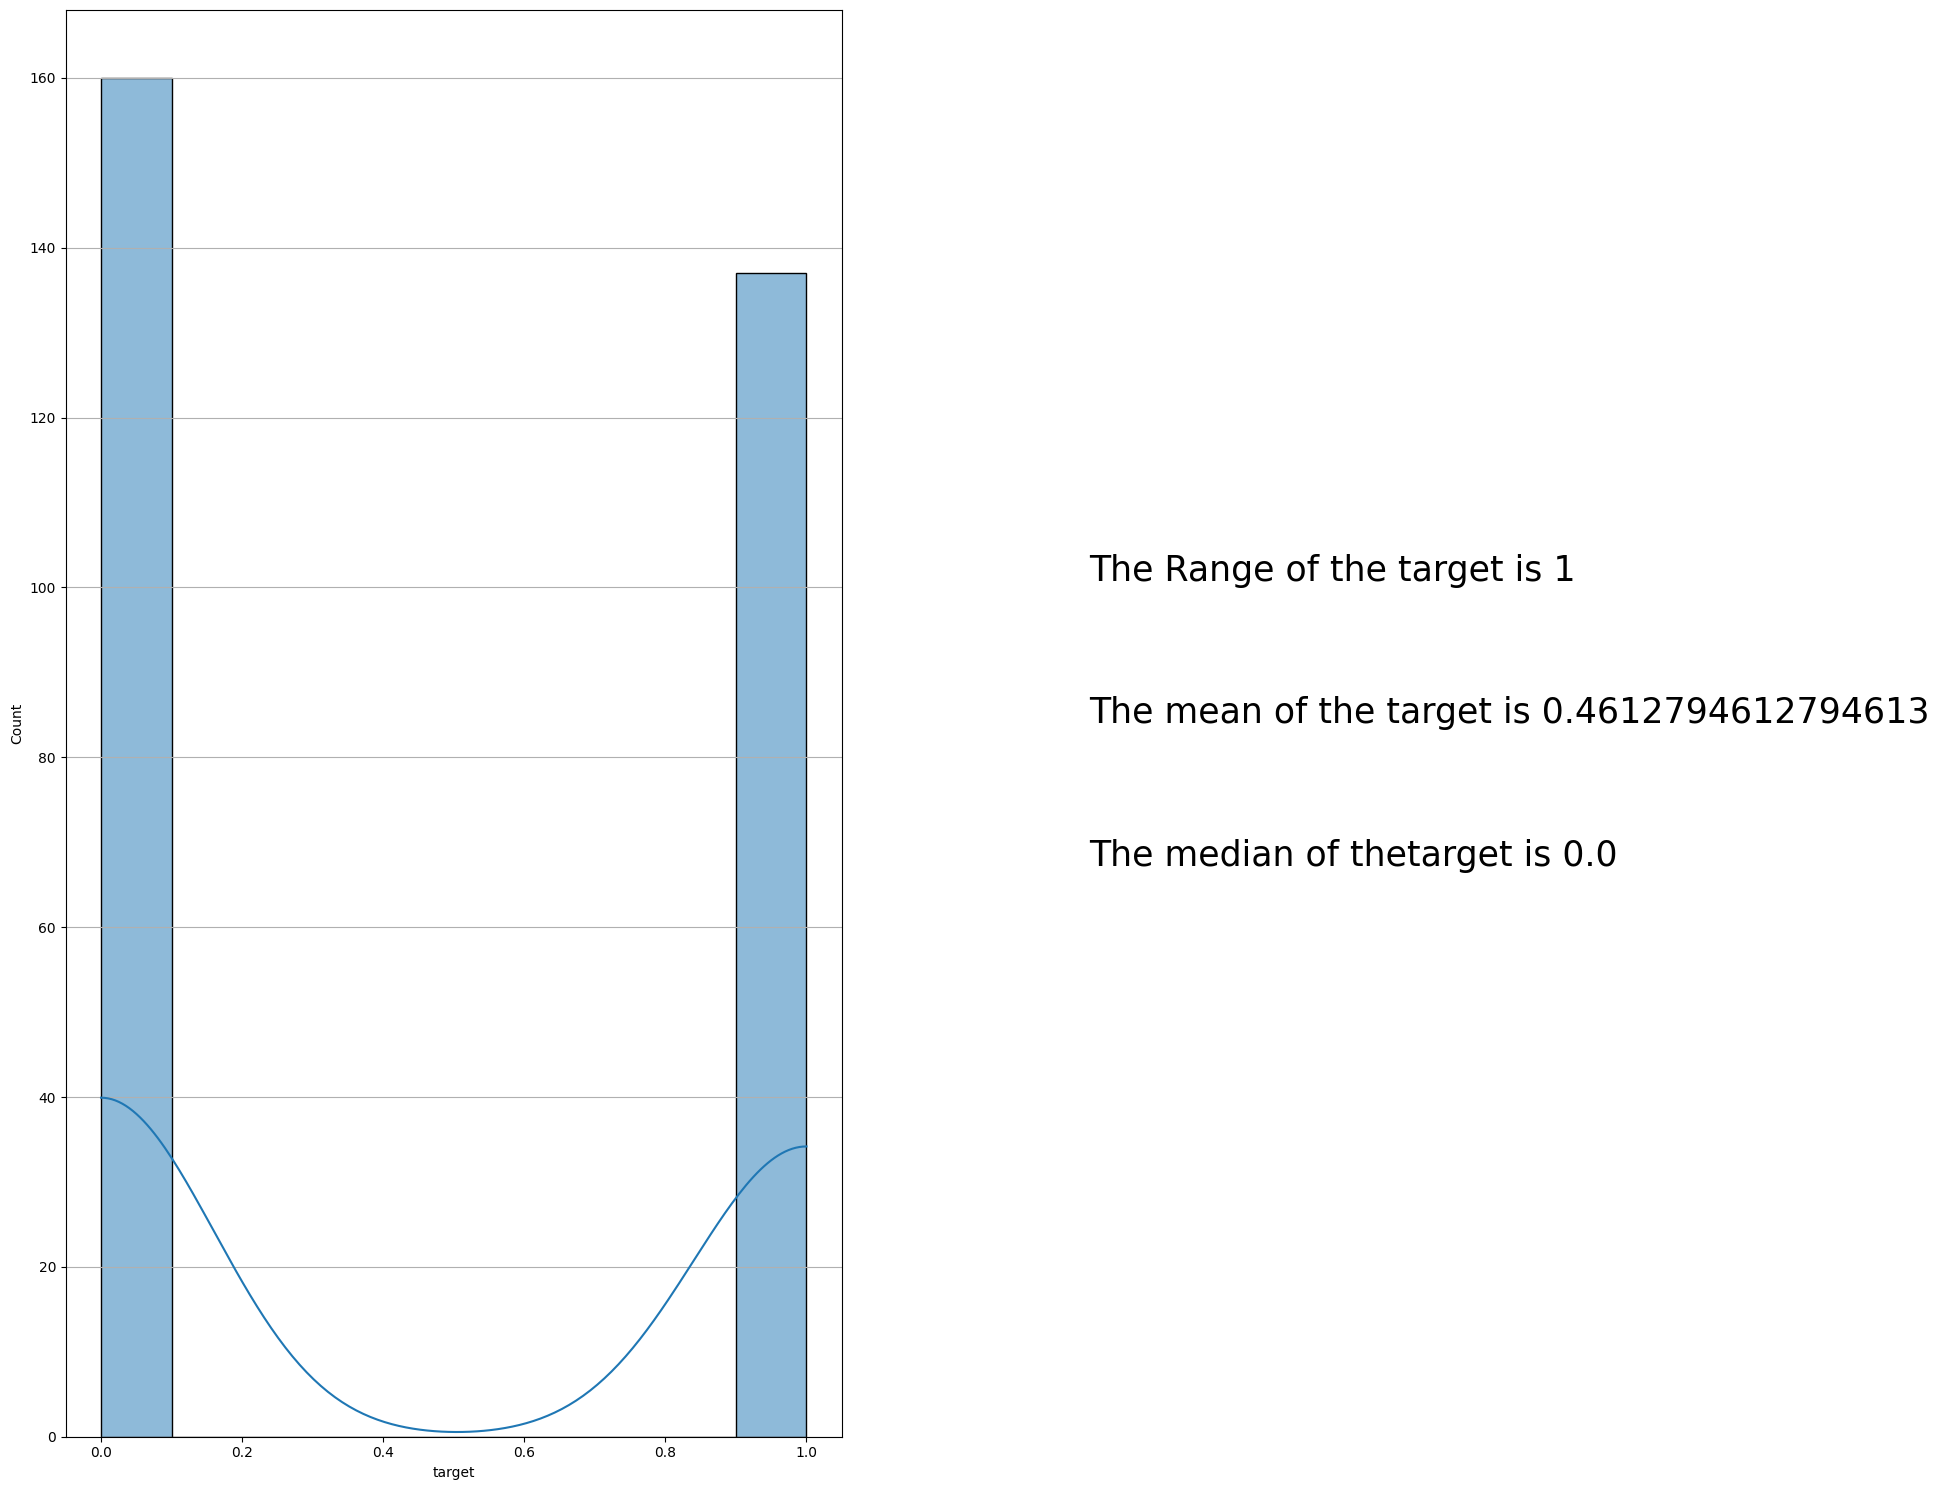

In [84]:
# Plot the distribution of the target variable with kernel density estimation

plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.histplot(df['target'],kde=True)
plt.grid(axis='y')

plt.subplot(1,2,2)
plt.text(.3,.5,f"The mean of the target is {df['target'].mean()}",fontsize=25)
plt.text(.3,.4,f"The median of thetarget is {df['target'].median()}",fontsize=25)
plt.text(.3,.6,f"The Range of the target is {df['target'].max()-df['target'].min()}",fontsize=25)
plt.axis('off')
plt.tight_layout()
plt.show()

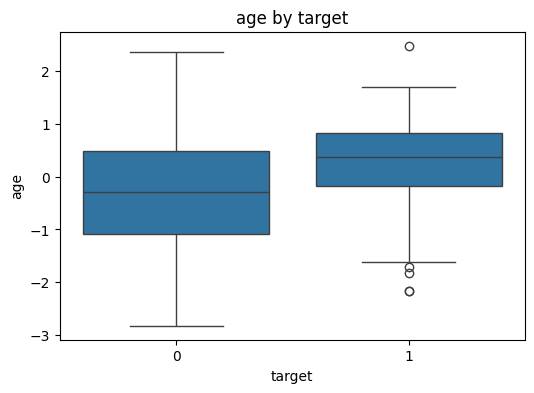

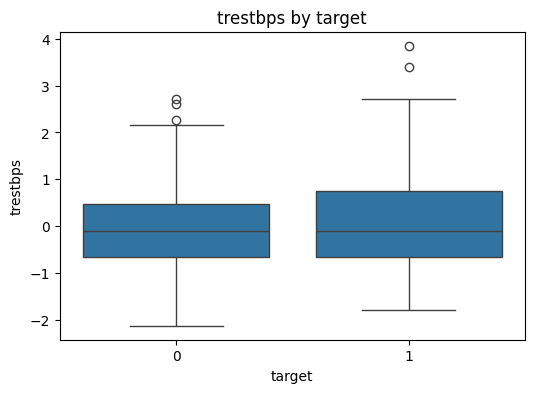

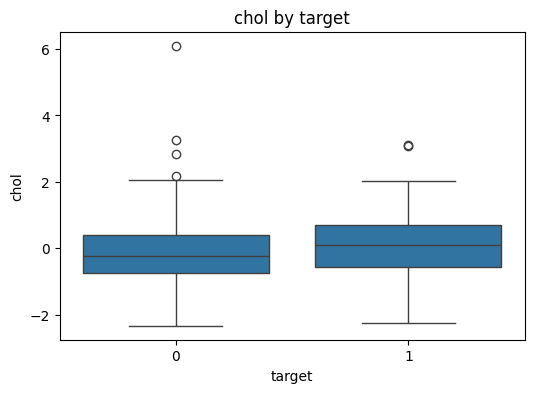

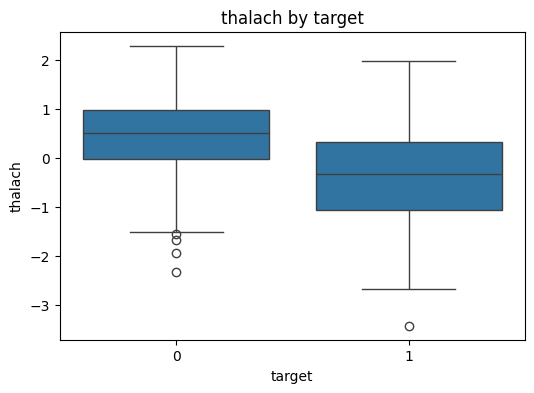

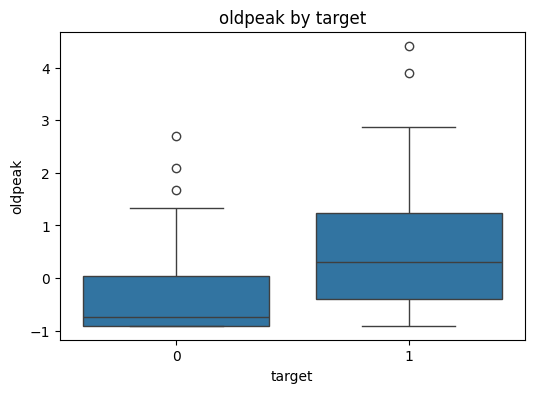

In [85]:
# Visualize the data distribution using boxplots.


for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col} by target")
    plt.show()


In [86]:
df.to_csv("../data/heart_disease.csv", index=False)
print("Data saved to ../data/heart_disease.csv Successfully.")


Data saved to ../data/heart_disease.csv Successfully.
